# COPY THE ASSIGNMENT AND START SOLVING

You have one question to answer and two gaps to fill

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# <h1 style='background:#C2C4E2; border:0; color:black'><center>RAIN PREDICTION</center></h1>


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#C2C4E2; border:0; color:black'><center>TABLE OF CONTENTS</center></h1>

[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)    

[3. DATA VISUALIZATION AND CLEANINGS](#3)     

[4. DATA PREPROCESSING](#4)     

[5. MODEL BUILDING](#5)

[6. CONCLUSION](#6)

[7. END](#7)
    
 <a id="1"></a>
<h1 style='background:#C2C4E2; border:0; color:black'><center>LIBRARIES</center></h1>

# IMPORTING LIBRARIES

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

<a id="2"></a>
<h1 style='background:#C2C4E2; border:0; color:black'><center>LOADING DATA</center></h1>

# LOADING DATA

In [ ]:
data = pd.read_csv("/content/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


**About the data:**

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.

In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42191 entries, 0 to 42190
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           42191 non-null  object 
 1   Location       42191 non-null  object 
 2   MinTemp        41830 non-null  float64
 3   MaxTemp        42001 non-null  float64
 4   Rainfall       41617 non-null  float64
 5   Evaporation    21912 non-null  float64
 6   Sunshine       16900 non-null  float64
 7   WindGustDir    37477 non-null  object 
 8   WindGustSpeed  37481 non-null  float64
 9   WindDir9am     37720 non-null  object 
 10  WindDir3pm     40240 non-null  object 
 11  WindSpeed9am   41517 non-null  float64
 12  WindSpeed3pm   40886 non-null  float64
 13  Humidity9am    41660 non-null  float64
 14  Humidity3pm    40998 non-null  float64
 15  Pressure9am    35739 non-null  float64
 16  Pressure3pm    35748 non-null  float64
 17  Cloud9am       25736 non-null  float64
 18  Cloud3

**Points to notice:**

* There are missing values in the dataset
* Dataset includes numeric and categorical values

<a id="3"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>DATA VISUALIZATION AND CLEANING</center></h2>

# DATA VISUALIZATION AND CLEANING

**Steps involves in this section:**

* Count plot of target column
* Correlation amongst numeric attributes
* Parse Dates into datetime
* Encoding days and months as continuous cyclic features


<ipython-input-5-9f925fcff129>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["RainTomorrow"], palette= cols)


<Axes: xlabel='RainTomorrow', ylabel='count'>

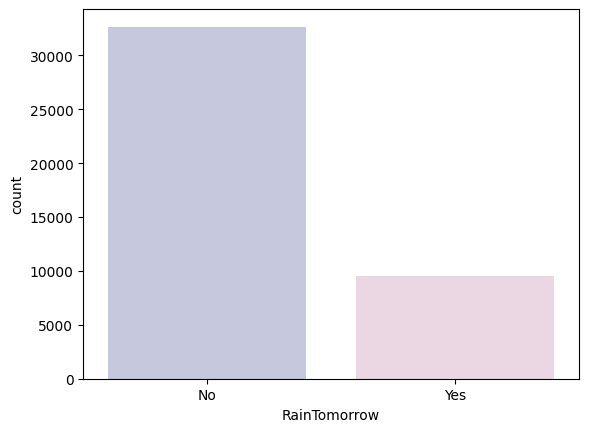

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

<Axes: >

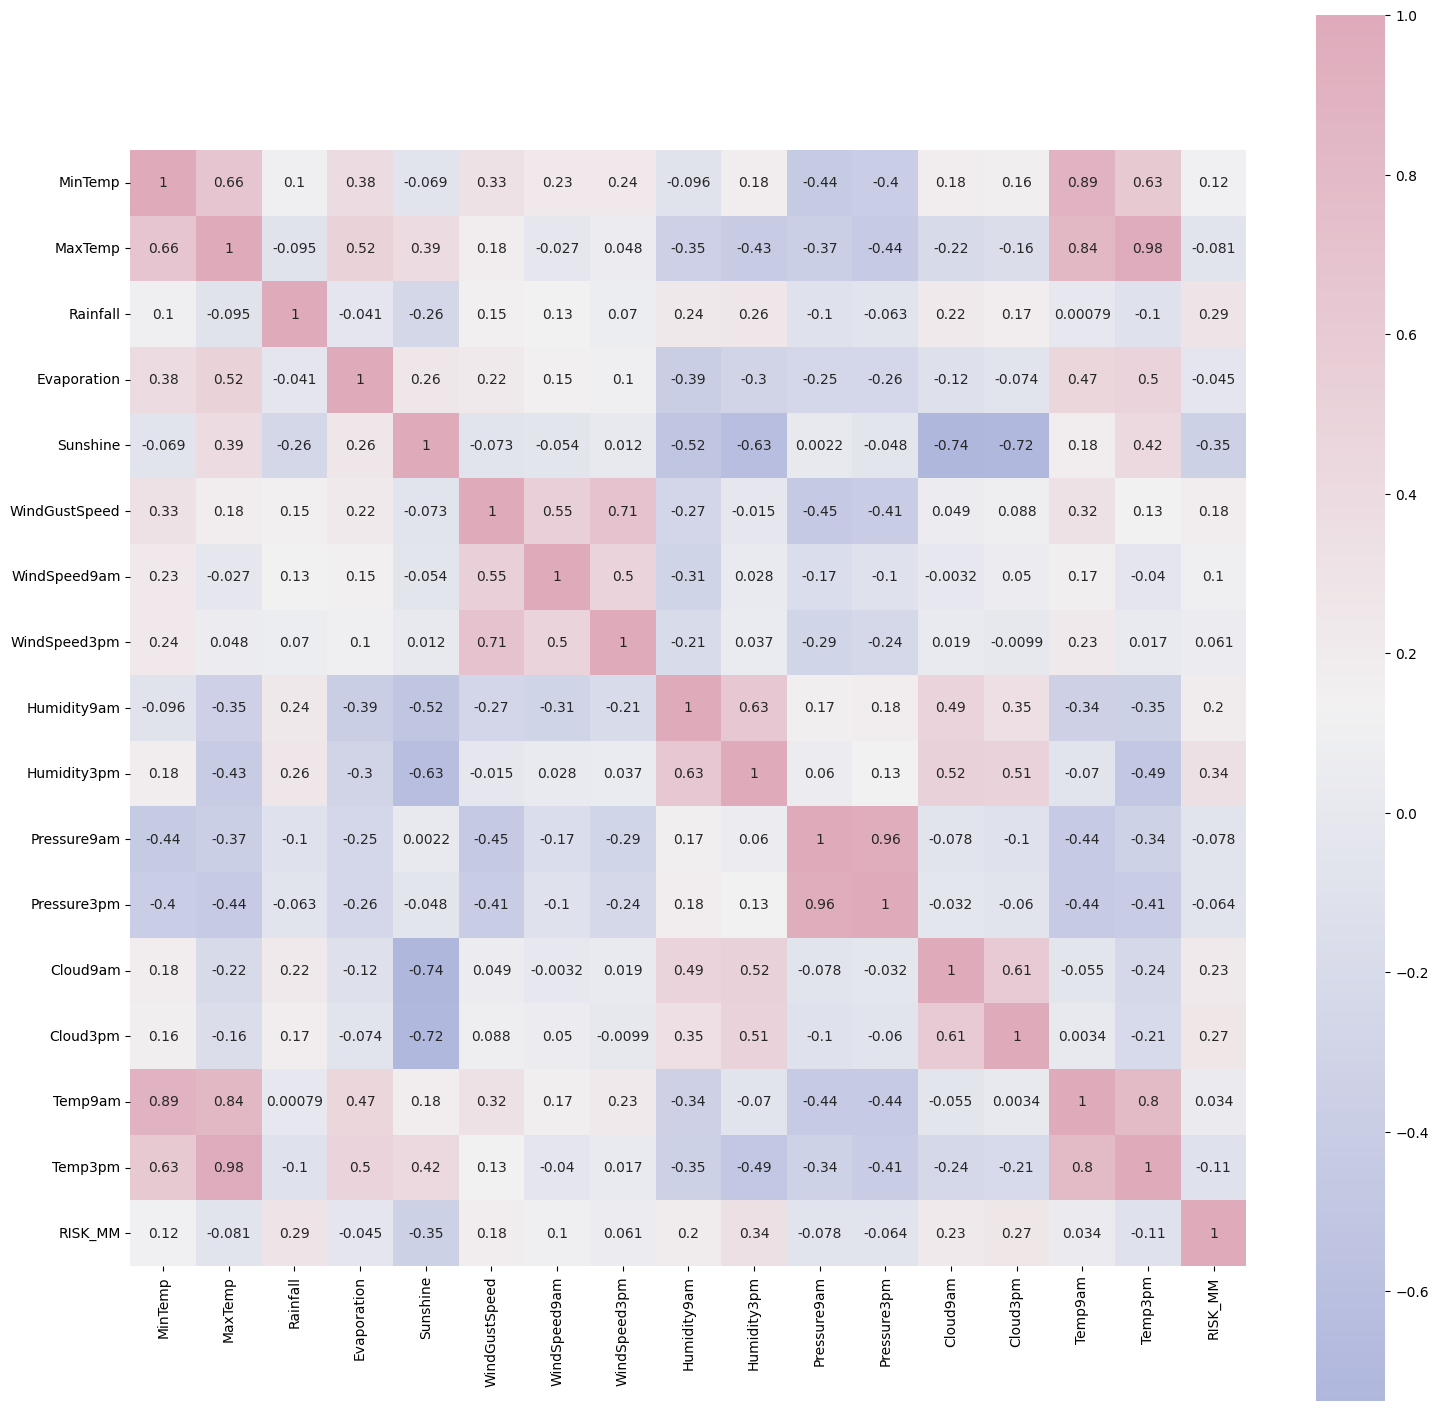

In [ ]:
# Correlation amongst numeric attributes
corrmat = data.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

**Now I will parse Dates into datetime.**

My goal is to build an artificial neural network(ANN). I will encode dates appropriately, i.e. I prefer the months and days in a cyclic continuous feature. As, date and time are inherently cyclical. To let the ANN model know that a feature is cyclical I split it into periodic subsections. Namely, years, months and days. Now for each subsection, I create two new features, deriving a sine transform and cosine transform of the subsection feature.

# **EXPLAIN ME WHY WE PARSE THE DATA IN A CYCLIC MANNER?**

Answer here

In [ ]:
#Parsing datetime
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

,count
Date,
10,42191


In [ ]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters.
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature.

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RISK_MM,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,No,0.0,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,No,1.0,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,No,0.2,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

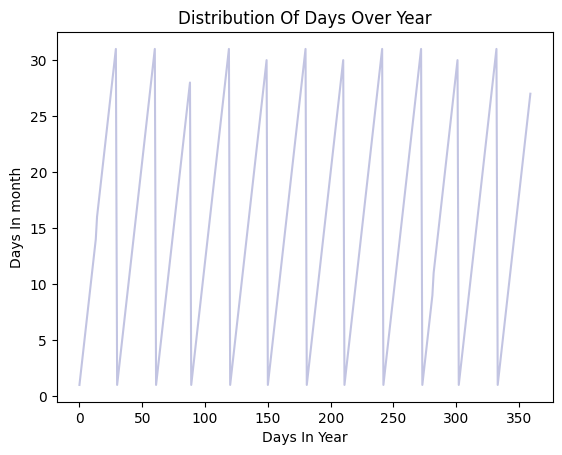

In [ ]:
# roughly a year's span section
section = data[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

As expected, the "year" attribute of data repeats. However in this for the true cyclic nature is not presented in a continuous manner. Splitting months and days into Sine and cosine combination provides the cyclical continuous feature. This can be used as input features to ANN.

Text(0.5, 0, 'Sine Encoded Months')

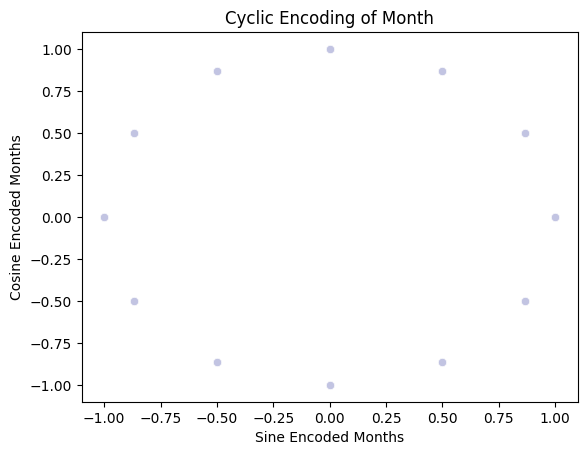

In [ ]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")


Text(0.5, 0, 'Sine Encoded Day')

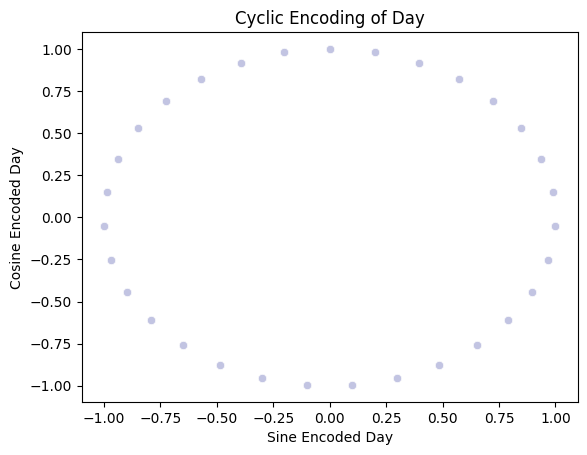

In [ ]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

Next, I will deal with missing values in categorical and numeric attributes separately

**Categorical variables**

* Filling missing values with mode of the column value

In [ ]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 4714
WindDir9am 4471
WindDir3pm 1951
RainToday 575
RainTomorrow 1


In [ ]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

<ipython-input-14-c47c2d6da7f2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


**Numerical variables**

* Filling missing values with median of the column value

In [ ]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [ ]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 361
MaxTemp 190
Rainfall 574
Evaporation 20279
Sunshine 25291
WindGustSpeed 4710
WindSpeed9am 674
WindSpeed3pm 1305
Humidity9am 531
Humidity3pm 1193
Pressure9am 6452
Pressure3pm 6443
Cloud9am 16455
Cloud3pm 16756
Temp9am 305
Temp3pm 969
RISK_MM 1
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [ ]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42191 entries, 0 to 42190
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           42191 non-null  datetime64[ns]
 1   Location       42191 non-null  object        
 2   MinTemp        42191 non-null  float64       
 3   MaxTemp        42191 non-null  float64       
 4   Rainfall       42191 non-null  float64       
 5   Evaporation    42191 non-null  float64       
 6   Sunshine       42191 non-null  float64       
 7   WindGustDir    42191 non-null  object        
 8   WindGustSpeed  42191 non-null  float64       
 9   WindDir9am     42191 non-null  object        
 10  WindDir3pm     42191 non-null  object        
 11  WindSpeed9am   42191 non-null  float64       
 12  WindSpeed3pm   42191 non-null  float64       
 13  Humidity9am    42191 non-null  float64       
 14  Humidity3pm    42191 non-null  float64       
 15  Pressure9am    4219

<ipython-input-17-ae2eb0e01834>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)


Text(0.5, 0, 'Years')

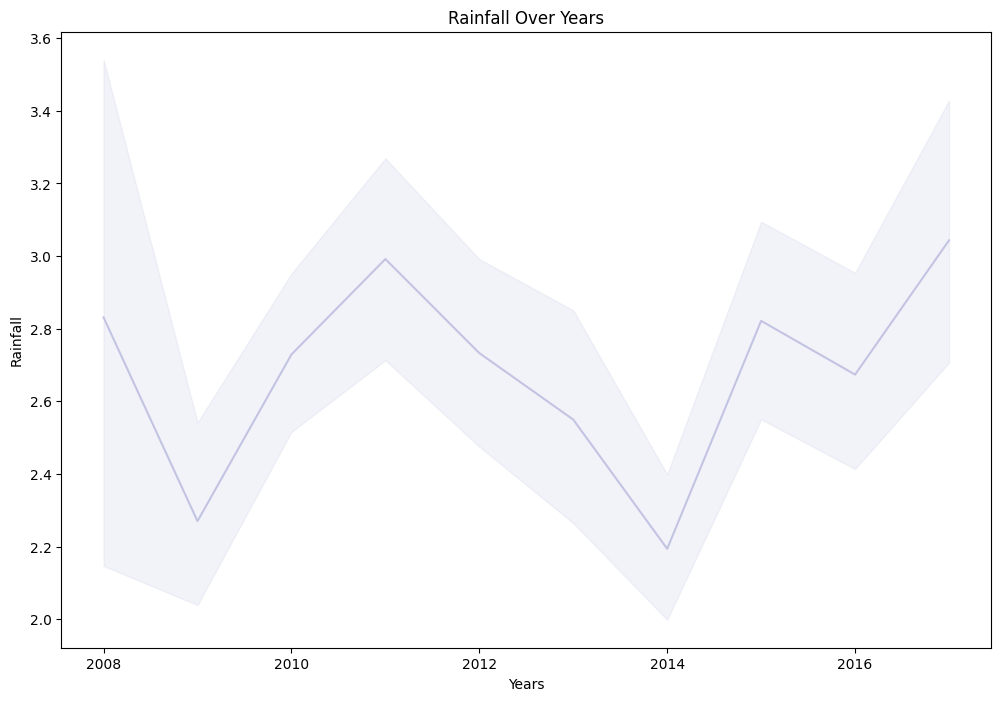

In [ ]:
#plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Rainfall",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")

<ipython-input-19-98c985829d42>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
<ipython-input-19-98c985829d42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
<ipython-input-19-98c985829d42>:4: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)


Text(0.5, 0, 'Year')

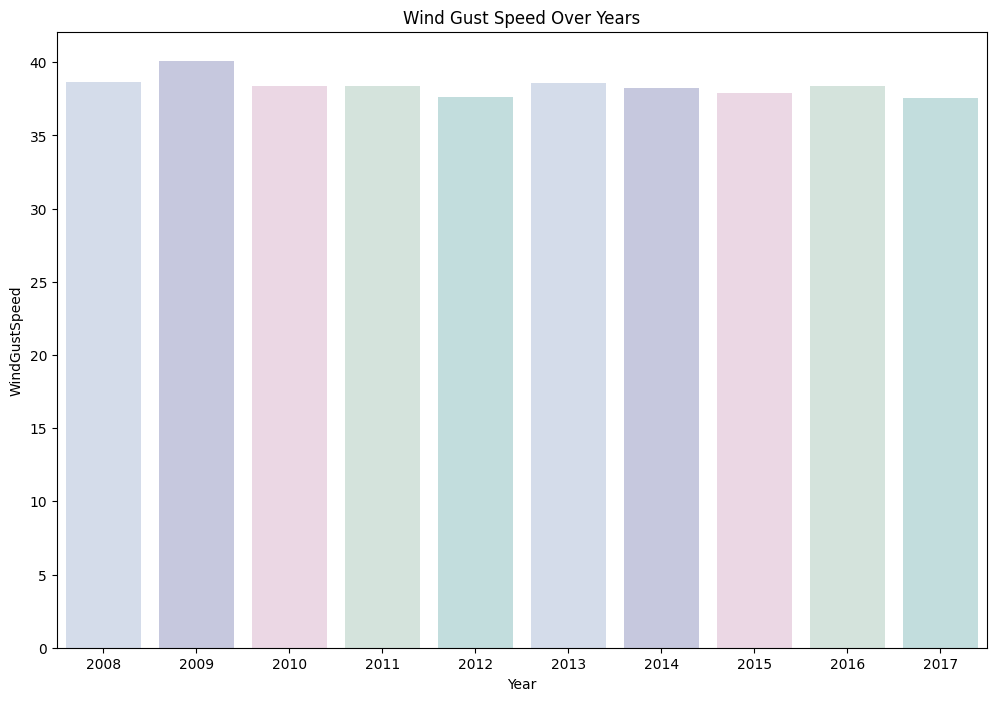

In [ ]:
#Evauating Wind gust speed over years
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Date'].dt.year,y="WindGustSpeed",data=data, ci =None,palette = colours)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("WindGustSpeed")
Days_of_week.set_xlabel("Year")

<a id="4"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>DATA PREPROCESSING</center></h2>

# DATA PREPROCESSING

**Steps involved in Data Preprocessing:**

* Label encoding columns with categorical data
* Perform the scaling of the features
* Detecting outliers
* Dropping the outliers based on data analysis

**Label encoding the catagorical varable**

In [ ]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42191 entries, 0 to 42190
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           42191 non-null  datetime64[ns]
 1   Location       42191 non-null  int64         
 2   MinTemp        42191 non-null  float64       
 3   MaxTemp        42191 non-null  float64       
 4   Rainfall       42191 non-null  float64       
 5   Evaporation    42191 non-null  float64       
 6   Sunshine       42191 non-null  float64       
 7   WindGustDir    42191 non-null  int64         
 8   WindGustSpeed  42191 non-null  float64       
 9   WindDir9am     42191 non-null  int64         
 10  WindDir3pm     42191 non-null  int64         
 11  WindSpeed9am   42191 non-null  float64       
 12  WindSpeed3pm   42191 non-null  float64       
 13  Humidity9am    42191 non-null  float64       
 14  Humidity3pm    42191 non-null  float64       
 15  Pressure9am    4219

In [ ]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,42191.0,1.293396e-16,1.000012,-1.615623,-0.883705,0.092186,0.824104,1.799995
MinTemp,42191.0,2.519428e-16,1.000012,-3.098952,-0.730562,0.099238,0.808026,2.865241
MaxTemp,42191.0,3.637677e-17,1.000012,-2.916416,-0.736778,-0.087878,0.610937,3.905351
Rainfall,42191.0,3.705041e-18,1.000012,-0.283012,-0.283012,-0.283012,-0.218715,39.474018
Evaporation,42191.0,-1.919885e-17,1.000012,-1.539806,-0.218580,-0.158524,-0.098468,42.000612
Sunshine,42191.0,-4.459523e-16,1.000012,-3.323032,0.179965,0.179965,0.179965,2.354238
WindGustDir,42191.0,2.627211e-17,1.000012,-1.564520,-0.703069,-0.056981,0.804470,1.665920
WindGustSpeed,42191.0,2.667630e-16,1.000012,-2.409946,-0.646271,-0.109500,0.427271,7.405291
WindDir9am,42191.0,9.161557e-17,1.000012,-1.779679,-0.907810,0.182026,0.835928,1.489829
WindDir3pm,42191.0,9.119454e-17,1.000012,-1.564016,-0.687486,-0.030088,0.846443,1.722973


<ipython-input-22-6d42aad80754>:5: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


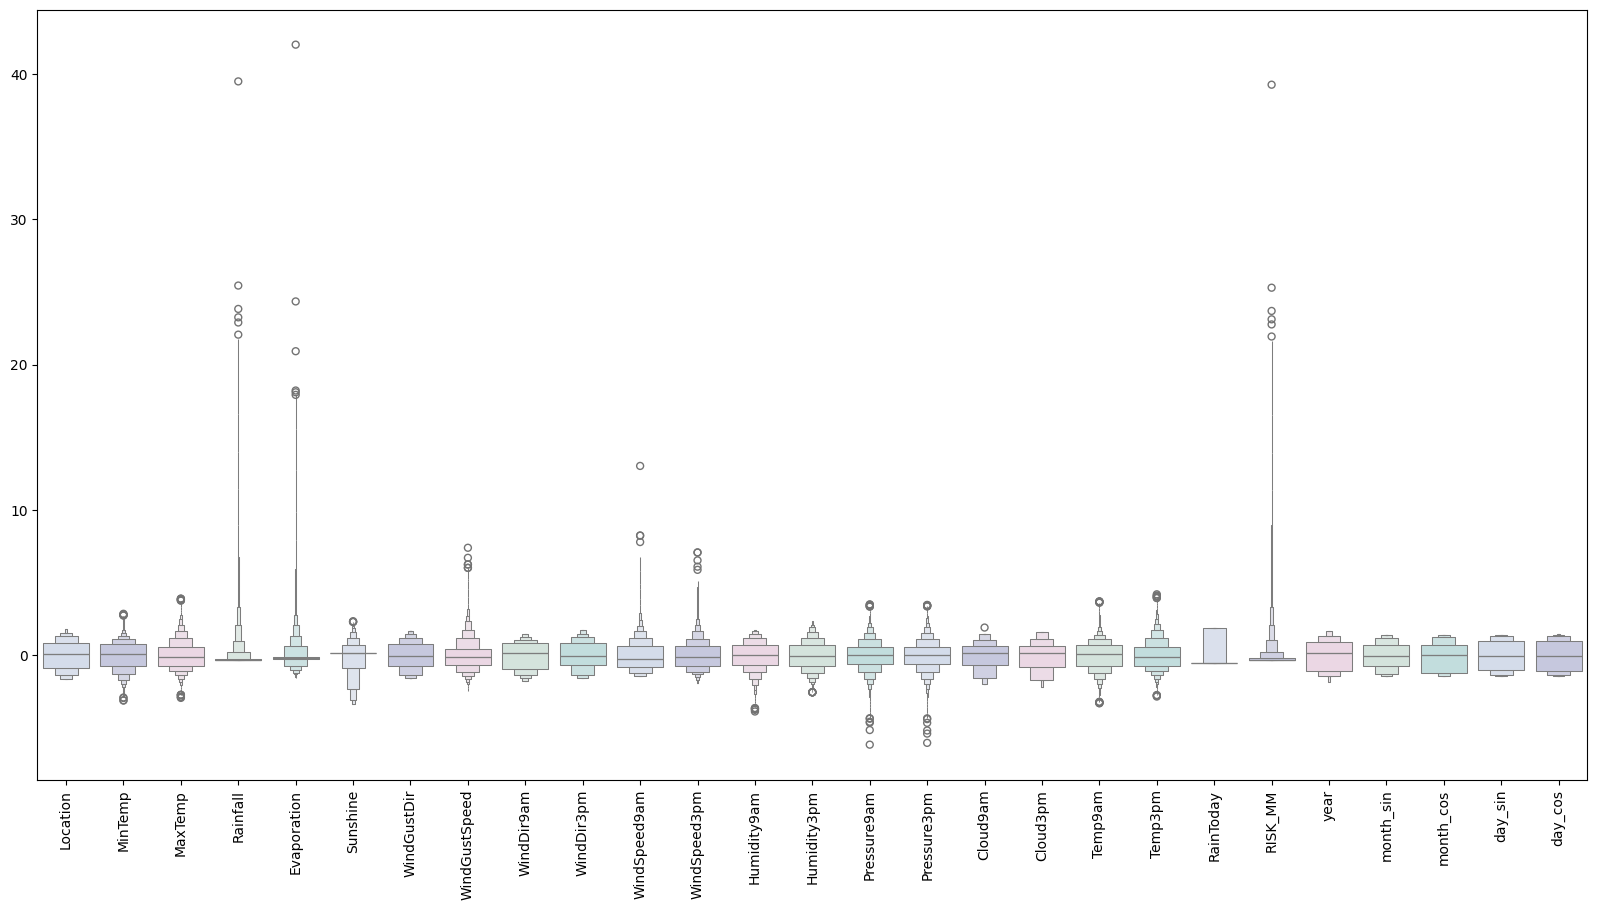

In [ ]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#full data for
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(36284, 28)

<ipython-input-24-0b9d7aa52ee8>:4: UserWarning: 
The palette list has fewer values (5) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


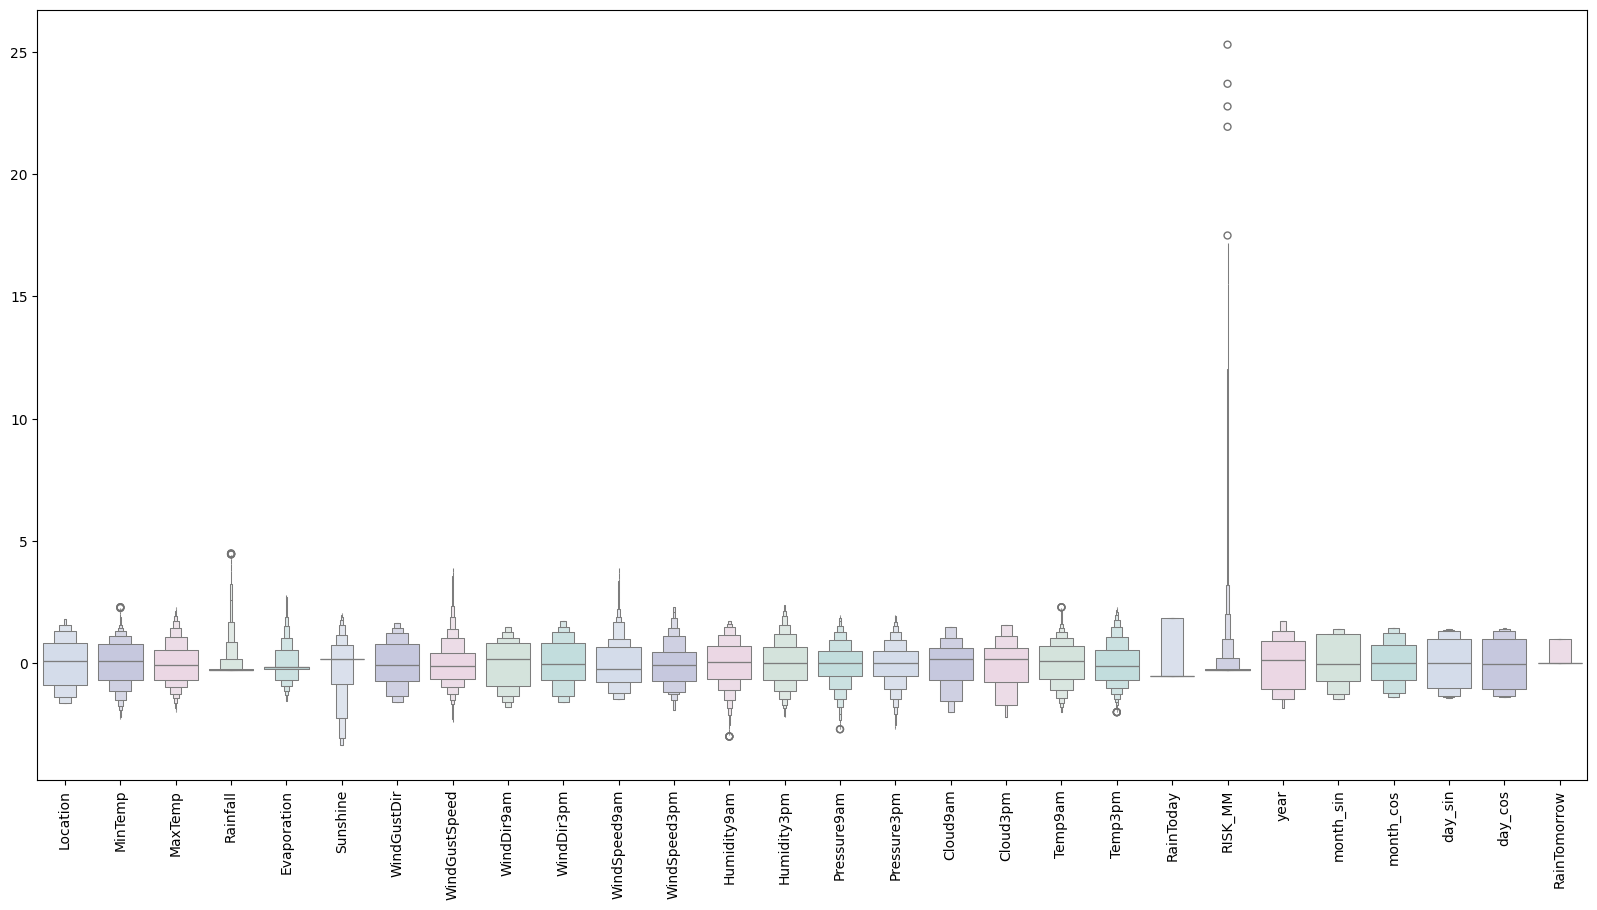

In [ ]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

Looks Good. Up next is building artificial neural network.

<a id="5"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>MODEL BUILDING</center></h2>

# MODEL BUILDING


**In this project, we build an artificial neural network.**

**Following steps are involved in the model building**

* Assining X and y the status of attributes and tags
* Splitting test and training sets
* Initialising the neural network
* Defining by adding layers
* Compiling the neural network
* Train the neural network

In [ ]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

relevant_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                   'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
                   'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                   'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'year', 'month_sin',
                   'month_cos', 'day_sin', 'day_cos', 'Location']
X_train, X_test, y_train, y_test = train_test_split(X[relevant_columns], y, test_size=0.2, random_state=42)

print(X_train.shape)

print(X.shape)

(29027, 26)
(36284, 27)


In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()


# MAKE A NEURAL NETWORK BY OUR OWN IN THE GAP PROVIDED
#TRY TO BRING THE BEST ACCURACY
# layers

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


# Compiling the ANN
#TRY WITH DIFFERENT LEARNING RATES FOR BEST ACCURACY
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


726/726 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7429 - loss: 0.5909 - val_accuracy: 0.8204 - val_loss: 0.4053
Epoch 2/150
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8410 - loss: 0.3719 - val_accuracy: 0.8286 - val_loss: 0.3874
Epoch 3/150
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8418 - loss: 0.3609 - val_accuracy: 0.8336 - val_loss: 0.3818
Epoch 4/150
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: 0.3619 - val_accuracy: 0.8345 - val_loss: 0.3780
Epoch 5/150
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8425 - loss: 0.3614 - val_accuracy: 0.8340 - val_loss: 0.3774
Epoch 6/150
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8468 - loss: 0.3517 - val_accuracy: 0.8353 - val_loss: 0.3755
Epoch 7/150
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3530 - val_accuracy: 0.8353 - val_loss: 0.3741
Epoch 8/150
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.3455 - val_accuracy: 0.8350

Plotting training and validation loss over epochs

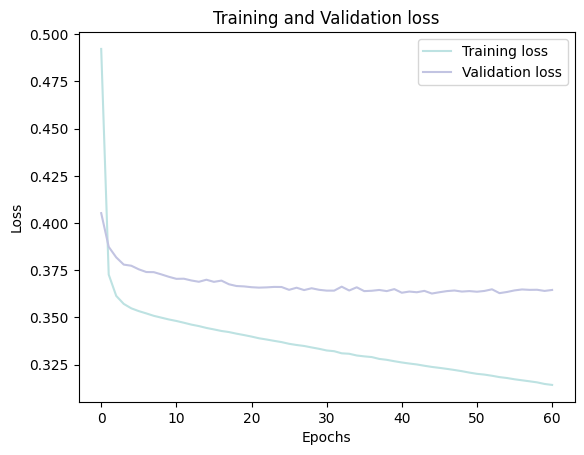

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

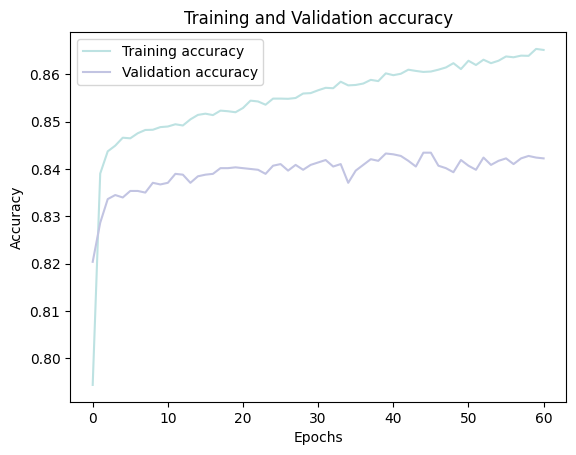

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id="6"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>CONCLUSION</center></h2>

# CONCLUSIONS


**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

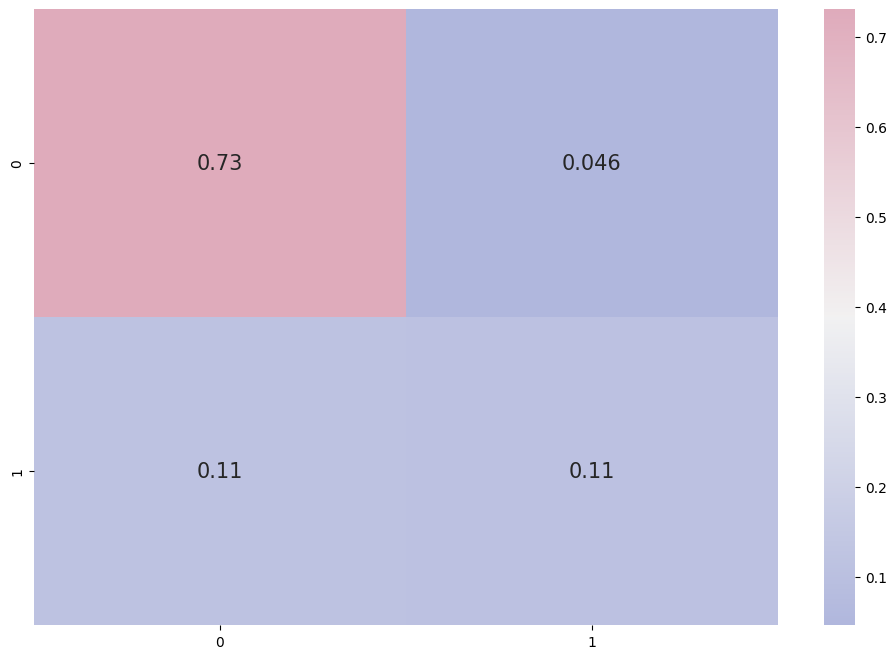

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5637
           1       0.70      0.49      0.58      1620

    accuracy                           0.84      7257
   macro avg       0.78      0.72      0.74      7257
weighted avg       0.83      0.84      0.83      7257





<a id="7"></a>
# <h1 style='background:#C2C4E2; border:0; color:black'><center>END</center></h1>